In [1]:
import pandas as pd

df = pd.read_csv("../data/biota/table_S15.csv")
df = df.drop("Unnamed: 0", axis=1)
df = df.set_index("taxonomy")
df = df.transpose()
df.index.name = "Participant_ID"
df.head()

taxonomy,Bacteria;Proteobacteria;Betaproteobacteria;Burkholderiales;Comamonadaceae;Tepidimonas,Bacteria;Firmicutes;Clostridia;Clostridiales;Christensenellaceae;Christensenellaceae R 7 group,Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Prevotellaceae;Prevotella,Bacteria;Firmicutes;Clostridia;Clostridiales;Family XIII;Family XIII AD3011 group,Bacteria;Firmicutes;Clostridia;Clostridiales;Ruminococcaceae;Ruminiclostridium,Bacteria;Proteobacteria;Gammaproteobacteria;Run SP154,Bacteria;Proteobacteria;Gammaproteobacteria;Pasteurellales;Pasteurellaceae;Frederiksenia,Bacteria;Actinobacteria;Actinobacteria;Corynebacteriales;Corynebacteriaceae;Corynebacterium 1,Bacteria;Proteobacteria;Gammaproteobacteria;Pseudomonadales;Moraxellaceae;Moraxella,Bacteria;Firmicutes;Clostridia;Clostridiales;Peptococcaceaencultured,...,Bacteria;Firmicutes;Bacilli;Lactobacillales;Lactobacillaceae;Lactobacillus,Bacteria;Actinobacteria;Actinobacteria;Pseudonocardiales;Pseudonocardiaceae;Actinomycetospora,Bacteria;Firmicutes;Clostridia;Clostridiales;Clostridiales vadinBB60 group,Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Prevotellaceae;Prevotella,Bacteria;Tenericutes;Mollicutes;Mollicutes RF9,Bacteria;Firmicutes;Clostridia;Clostridiales;Ruminococcaceae;Ruminococcus 1,Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Blautia,Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Roseburia,Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceaencultured,Bacteria;Firmicutes;Clostridia;Clostridiales;Ruminococcaceae;Ruminococcaceae UCG 014
Participant_ID,,,,,,,,,,,,,,,,,,,,,
C3002,0,0,0,1,2,0,0,8,0,12,...,0,0,0,0,0,0,481,0,0,0
C3003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,16,0,0,0
C3004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,117,0,0,0
C3005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,63,0,0,0
C3006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,134,0,0,0


In [2]:
meta = pd.read_csv("../data/biota/IBD_metadata.csv")
meta = meta.set_index("Participant_ID")
meta = meta.join(df)
meta.head()

,External_ID,Biopsy_location,Diagnosis,Gender,Bacteria;Proteobacteria;Betaproteobacteria;Burkholderiales;Comamonadaceae;Tepidimonas,Bacteria;Firmicutes;Clostridia;Clostridiales;Christensenellaceae;Christensenellaceae R 7 group,Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Prevotellaceae;Prevotella,Bacteria;Firmicutes;Clostridia;Clostridiales;Family XIII;Family XIII AD3011 group,Bacteria;Firmicutes;Clostridia;Clostridiales;Ruminococcaceae;Ruminiclostridium,Bacteria;Proteobacteria;Gammaproteobacteria;Run SP154,...,Bacteria;Firmicutes;Bacilli;Lactobacillales;Lactobacillaceae;Lactobacillus,Bacteria;Actinobacteria;Actinobacteria;Pseudonocardiales;Pseudonocardiaceae;Actinomycetospora,Bacteria;Firmicutes;Clostridia;Clostridiales;Clostridiales vadinBB60 group,Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Prevotellaceae;Prevotella,Bacteria;Tenericutes;Mollicutes;Mollicutes RF9,Bacteria;Firmicutes;Clostridia;Clostridiales;Ruminococcaceae;Ruminococcus 1,Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Blautia,Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Roseburia,Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceaencultured,Bacteria;Firmicutes;Clostridia;Clostridiales;Ruminococcaceae;Ruminococcaceae UCG 014
Participant_ID,,,,,,,,,,,,,,,,,,,,,
C3002,206618,Sigmoid Colon,CD,Female,0,0,0,1,2,0,...,0,0,0,0,0,0,481,0,0,0
C3003,206622,Sigmoid Colon,UC,Female,0,0,0,0,0,0,...,0,0,0,0,0,0,16,0,0,0
C3004,206625,Sigmoid Colon,UC,Female,0,0,0,0,0,0,...,0,0,0,0,0,0,117,0,0,0
C3005,206628,Rectum,UC,Female,0,0,0,0,0,0,...,0,0,0,0,0,0,63,0,0,0
C3006,206630,Rectum,UC,Male,0,0,0,0,0,0,...,0,0,0,0,0,0,134,0,0,0


In [3]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

pipeline = Pipeline([('scaling', StandardScaler()), ('pca', PCA(n_components=50))])
pipeline.fit(df.values)
pipeline.steps[1][1].explained_variance_ratio_

array([0.07340357, 0.05417583, 0.04120604, 0.03649122, 0.03026853,
       0.02896312, 0.02876238, 0.02814886, 0.02769419, 0.02615954,
       0.02480868, 0.02462726, 0.02381314, 0.02323252, 0.02273376,
       0.02191755, 0.0212058 , 0.0202866 , 0.01999389, 0.01867968,
       0.01762782, 0.01650473, 0.0151284 , 0.01477336, 0.01435259,
       0.01409526, 0.01366083, 0.01295407, 0.01278629, 0.01234616,
       0.01208014, 0.01153126, 0.01110077, 0.01084197, 0.01035949,
       0.01002231, 0.00951025, 0.00919215, 0.00866952, 0.00835307,
       0.00801229, 0.00779107, 0.00772833, 0.00762543, 0.0075117 ,
       0.00691955, 0.0067873 , 0.00665492, 0.00662437, 0.00625522])

Text(0, 0.5, 'Explained Variance Ratio')

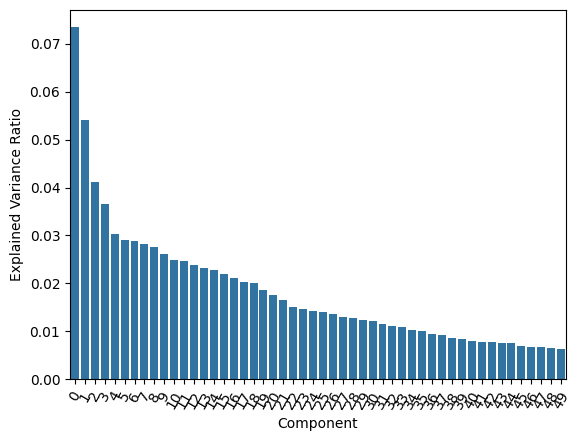

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(pipeline.steps[1][1].explained_variance_ratio_)

ax = plt.gca()
ax.tick_params(axis='x', rotation=60)
ax.set_xlabel("Component")
ax.set_ylabel("Explained Variance Ratio")

Text(0, 0.5, 'Explained Variance')

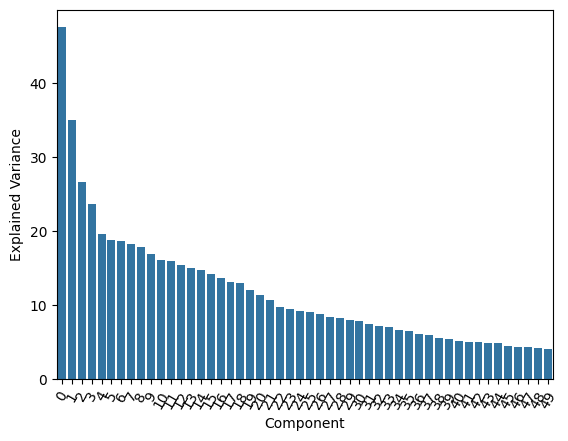

In [5]:
sns.barplot(pipeline.steps[1][1].explained_variance_)

ax = plt.gca()
ax.tick_params(axis='x', rotation=60)
ax.set_xlabel("Component")
ax.set_ylabel("Explained Variance")

Text(0.5, 0, 'p3')

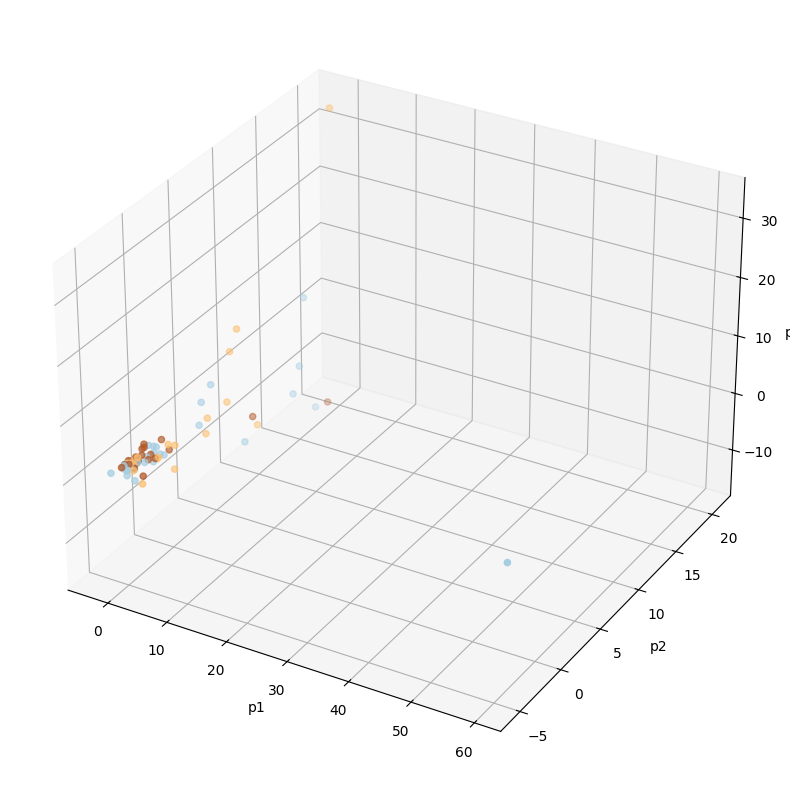

In [6]:
out = pipeline.transform(df.values)
pca = pd.DataFrame()
pca.index = meta.index
pca['p1'] = out[:,0]
pca['p2'] = out[:,1]
pca['p3'] = out[:,2]
pca['diagnosis'] = pd.factorize(meta['Diagnosis'])[0]

fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(
    xs=pca.p1,
    ys=pca.p2,
    zs=pca.p3,
    c=pca.diagnosis,
    cmap='Paired'
)
ax.set_xlabel('p1')
ax.set_ylabel('p2')
ax.set_zlabel('p3')


Text(0.5, 0, 'p3')

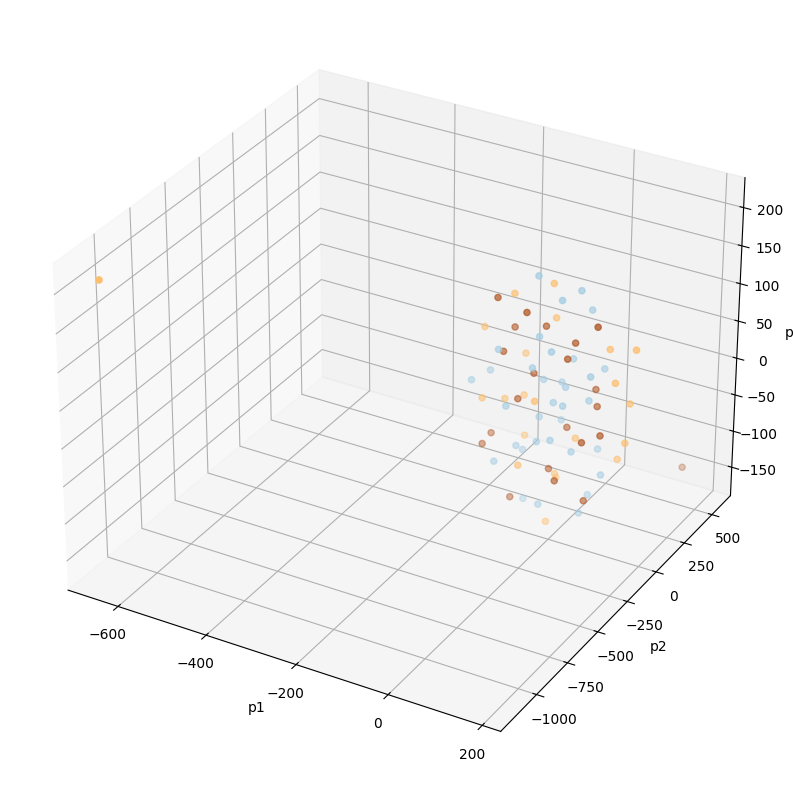

In [8]:
from sklearn.manifold import TSNE

tsne_pipeline = Pipeline([('scaling', StandardScaler()), ('tsne', TSNE(n_components=3, perplexity=5, learning_rate=50))])
tsne_data = tsne_pipeline.fit_transform(df.values)

fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(
    xs=tsne_data[:,0],
    ys=tsne_data[:,1],
    zs=tsne_data[:,2],
    c=pca.diagnosis,
    cmap='Paired'
)
ax.set_xlabel('p1')
ax.set_ylabel('p2')
ax.set_zlabel('p3')
